## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

## Pre-processing
#### - Change Rgb image to grayscale
#### - Resize picture

In [7]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width  = im_data.shape[:2]
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(im_data, cmap='gray')
    plt.show()

In [2]:
ESC = 27
def display(path):
    img = cv2.imread(path)
    cv2.imshow("img", img)

    while True:
        if cv2.waitKey(1) & 0xFF == ESC: 
            break
    cv2.destroyAllWindows()

In [3]:
ESC = 27
def display_img(img):
    # img = cv2.imread(path)
    cv2.imshow("img", img)

    while True:
        if cv2.waitKey(1) & 0xFF == ESC: 
            break
    cv2.destroyAllWindows()

In [4]:
# list file
input_path = "./Input-test/"
input_files = os.listdir(input_path)

In [6]:
# get full path of all image
paths = []
full_input_path = os.getcwd() + input_path[1:]
for files in input_files:
    paths.append(os.path.join(full_input_path + files))

In [7]:
# using append() with a list
gray_imgs = []
target_size = (100, 100)
for path in paths:
    img = cv2.imread(path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_img_resized = cv2.resize(gray_img, target_size)
    gray_imgs.append(gray_img_resized)
    # cv2.imshow("img", gray_img)
    # cv2.waitKey(1000)
# cv2.destroyAllWindows()
gray_imgs = np.array(gray_imgs)

In [18]:
gray_imgs.shape

(8, 100, 100)

In [6]:
# Using np.append() (without resizing) -> cannot use bacause size of picture not same and if not define axis, It will be flattern
# img = cv2.imread(paths[0])
# gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray_imgs = np.array(gray_img)
# # gray_imgs.shape
# for i in range(1, len(paths)):
#     img = cv2.imread(paths[i])
#     gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray_imgs = np.append(gray_imgs, gray_img)


In [19]:
# # Using np.vstack() with resizing
# target_size = (100, 100)
# gray_imgs = np.empty((0, *target_size))  # Initialize empty array with target size

# for path in paths:
#     img = cv2.imread(path)
#     gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray_img_resized = cv2.resize(gray_img, target_size)
#     gray_imgs = np.vstack([gray_imgs, gray_img_resized[np.newaxis, ...]])
#     print(np.newaxis)
#     print("----")
#     # gray_imgs = np.append(gray_imgs, gray_img_resized)

#     # cv2.imshow("img", gray_img_resized)
#     # cv2.waitKey(1000)
# # cv2.destroyAllWindows()
# print(gray_img)


None
----
None
----
None
----
None
----
None
----
None
----
None
----
[[18 20 27 ... 92 77 78]
 [34 26 22 ... 97 82 82]
 [39 26 17 ... 98 83 83]
 ...
 [11 18 23 ... 57 58 67]
 [21 12 11 ... 49 65 74]
 [15 22 21 ... 65 59 60]]


In [16]:
display("./Input-test/chang.jpg")

In [8]:
img = cv2.imread("./Input-test/chang.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh, im_bw = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
# cv2.imwrite("./Input-test/chang_th.jpg")

In [ ]:
# display_img(binary_image)
display_img(im_bw)

In [9]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [12]:
rm_noise = noise_removal(im_bw)
rm_noise

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
# cv2.cvtColor(rm_noise, cv2.

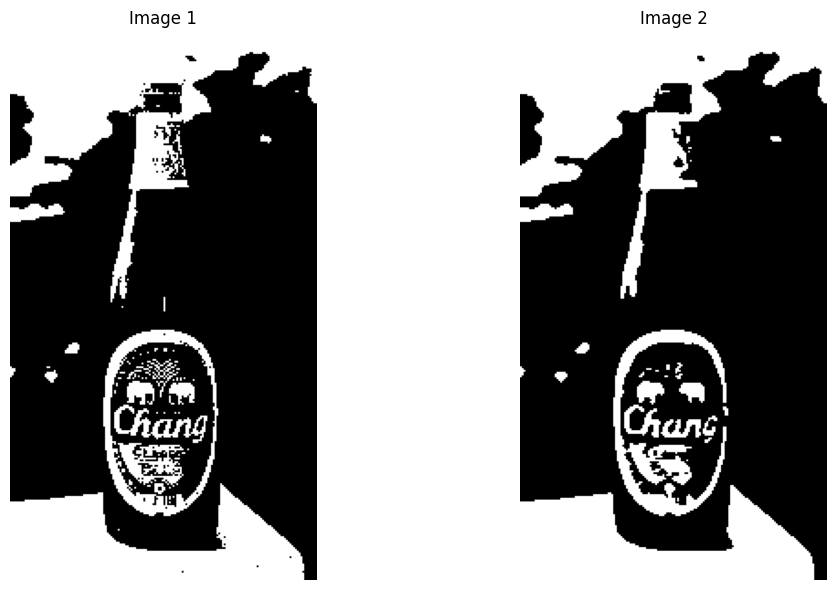

In [13]:
# Create a figure to display the images
plt.figure(figsize=(12, 6))  # Set the figure size

# Display the first image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(im_bw, cmap='gray')
plt.title('Image 1')  # Title for the first image
plt.axis('off')      # Hide axes

# Display the second image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(rm_noise, cmap='gray')
plt.title('Image 2')  # Title for the second image
plt.axis('off')      # Hide axes

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


In [14]:
def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

In [15]:
# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

In [19]:
new = cv2.imread("./Input-test/chang-re.jpg")
fixed = deskew(new)

1


In [20]:
fixed

array([[[ 59, 109,  67],
        [ 59, 107,  65],
        [ 58, 104,  62],
        ...,
        [ 19,  37,  14],
        [ 20,  38,  15],
        [ 20,  38,  15]],

       [[ 59, 109,  67],
        [ 59, 107,  65],
        [ 58, 104,  62],
        ...,
        [ 19,  37,  14],
        [ 20,  38,  15],
        [ 20,  38,  15]],

       [[ 59, 109,  67],
        [ 59, 107,  65],
        [ 58, 104,  62],
        ...,
        [ 19,  37,  14],
        [ 20,  38,  15],
        [ 20,  38,  15]],

       ...,

       [[ 88, 156, 131],
        [ 72, 140, 117],
        [ 62, 128, 109],
        ...,
        [ 22,  44,  26],
        [ 22,  44,  26],
        [ 22,  44,  26]],

       [[ 88, 156, 131],
        [ 72, 140, 117],
        [ 62, 128, 109],
        ...,
        [ 22,  44,  26],
        [ 22,  44,  26],
        [ 22,  44,  26]],

       [[ 88, 156, 131],
        [ 72, 140, 117],
        [ 62, 128, 109],
        ...,
        [ 22,  44,  26],
        [ 22,  44,  26],
        [ 22,  44,  26]]

In [ ]:
display_img(fixed)

In [11]:
import cv2
import pytesseract

# Update this path to where Tesseract is installed
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Step 1: Read the image
image = cv2.imread("./Input-test/5.jpg")  # Replace with your image path

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply thresholding to improve text visibility
# You can adjust the thresholding method based on your image
_, binary_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 4: Use Tesseract to detect text and get bounding box coordinates
# Use `output_type=pytesseract.Output.DICT` to get a dictionary output
data = pytesseract.image_to_data(binary_image, output_type=pytesseract.Output.DICT)
# data
# Step 5: Loop through the detected text and draw bounding boxes
for i in range(len(data['text'])):
    if int(data['conf'][i]) > 60:  # Confidence threshold to filter out weak detections
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        # Draw a rectangle around the detected text
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green bounding box

# # Step 6: Display the results
display_img(image)
# cv2.imshow("Detected Text", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [14]:
import pytesseract
import cv2
image = cv2.imread("./Input-test/chang.jpg")
base_image = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 13))
dilate = cv2.dilate(thresh, kernal, iterations=1)
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cents[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if h > 200 and w > 20:
        roi = image[y:y+h, x:x+h]
        cv2.imwrite("./Input-test/chang_test.jpg", roi)
        cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 2)
# cv2.imwrite("temp/index_bbox_new.png", image)

In [15]:
display("./Input-test/chang_test.jpg")

In [31]:
# img = cv2.imread("./Input-test/plain-text.png")
img = cv2.imread("./Input-test/chang_test.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh, im_bw = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
# display_img(im_bw)
text =  pytesseract.image_to_string(im_bw)
text

'\x0c'

In [ ]:
# 